In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
import os
os.chdir('/content/drive/MyDrive/')

In [12]:
# Step 1: Install and import necessary packages
import sqlite3
import pandas as pd
from google.colab import files

# Step 2: Upload a CSV file
uploaded = files.upload()

# Step 3: Read the uploaded file
df = pd.read_csv(list(uploaded.keys())[0])  # Automatically reads the uploaded file
print("First 5 rows of the uploaded file:")
display(df.head())

# Step 4: Create in-memory SQLite DB and write DataFrame to it
conn = sqlite3.connect(':memory:')
df.to_sql('my_table', conn, index=False, if_exists='replace')

# Step 5: Run SQL Query
query = 'SELECT * FROM my_table LIMIT 5'
result = pd.read_sql_query(query, conn)
print("SQL Query Result:")
display(result)


Saving tfl_journeys_final.csv to tfl_journeys_final (1).csv
First 5 rows of the uploaded file:


,month,year,days,report_date,journey_type,journeys_millions
0,1,2010,31,06/30/2010,Underground & DLR,96.836391
1,2,2010,28,06/30/2010,Underground & DLR,90.330504
2,3,2010,31,06/30/2010,Underground & DLR,90.038014
3,4,2010,30,09/30/2010,Underground & DLR,92.544093
4,5,2010,31,09/30/2010,Underground & DLR,88.662911


SQL Query Result:


,month,year,days,report_date,journey_type,journeys_millions
0,1,2010,31,06/30/2010,Underground & DLR,96.836391
1,2,2010,28,06/30/2010,Underground & DLR,90.330504
2,3,2010,31,06/30/2010,Underground & DLR,90.038014
3,4,2010,30,09/30/2010,Underground & DLR,92.544093
4,5,2010,31,09/30/2010,Underground & DLR,88.662911


-- **most_popular_transport_types**

In [14]:
# STEP 2: Create SQLite in-memory DB and load the DataFrame
conn = sqlite3.connect(':memory:')
df.to_sql('JOURNEYS', conn, index=False, if_exists='replace')


936

In [15]:
# STEP 3: Run SQL query using pandas
query = """
WITH most_popular_transport_types AS (
    SELECT JOURNEY_TYPE, SUM(JOURNEYS_MILLIONS) AS TOTAL_JOURNEYS_MILLIONS
    FROM JOURNEYS
    GROUP BY JOURNEY_TYPE
    ORDER BY TOTAL_JOURNEYS_MILLIONS DESC
)
SELECT JOURNEY_TYPE, TOTAL_JOURNEYS_MILLIONS FROM most_popular_transport_types
"""

most_popular_transport_types_df = pd.read_sql_query(query, conn)
most_popular_transport_types_df.head()


,JOURNEY_TYPE,TOTAL_JOURNEYS_MILLIONS
0,Bus,24905.193947
1,Underground & DLR,15020.466544
2,Overground,1666.845666
3,TfL Rail,411.313421
4,Tram,314.689875


-- **emirates_airline_popularity**

In [16]:
# Create in-memory SQLite database and store the table
conn = sqlite3.connect(':memory:')
df.to_sql('JOURNEYS', conn, index=False, if_exists='replace')


936

In [17]:
query = """
WITH emirates_airline_popularity AS (
    SELECT MONTH, YEAR, ROUND(SUM(JOURNEYS_MILLIONS), 2) AS ROUNDED_JOURNEYS_MILLIONS
    FROM JOURNEYS
    WHERE MONTH IS NOT NULL
      AND YEAR IS NOT NULL
      AND JOURNEYS_MILLIONS IS NOT NULL
      AND JOURNEY_TYPE = 'Emirates Airline'
    GROUP BY MONTH, YEAR
    ORDER BY ROUNDED_JOURNEYS_MILLIONS DESC
    LIMIT 5
)
SELECT MONTH, YEAR, ROUNDED_JOURNEYS_MILLIONS FROM emirates_airline_popularity;
"""

# Run the query and display results
result_df = pd.read_sql_query(query, conn)
result_df


,MONTH,YEAR,ROUNDED_JOURNEYS_MILLIONS
0,5,2012,0.53
1,6,2012,0.38
2,4,2012,0.24
3,5,2013,0.19
4,5,2015,0.19


-- **least_popular_years_tube**

In [18]:
# Create SQLite DB and load data
conn = sqlite3.connect(':memory:')
df.to_sql('JOURNEYS', conn, index=False, if_exists='replace')


936

In [19]:
query = """
WITH least_popular_years_tube AS (
    SELECT YEAR, JOURNEY_TYPE, ROUND(SUM(JOURNEYS_MILLIONS), 2) AS TOTAL_JOURNEYS_MILLIONS
    FROM JOURNEYS
    WHERE JOURNEY_TYPE = 'Underground & DLR'
    GROUP BY YEAR, JOURNEY_TYPE
    ORDER BY TOTAL_JOURNEYS_MILLIONS ASC
    LIMIT 5
)
SELECT YEAR, JOURNEY_TYPE, TOTAL_JOURNEYS_MILLIONS FROM least_popular_years_tube;
"""

# Execute query
result_df = pd.read_sql_query(query, conn)
result_df


,YEAR,JOURNEY_TYPE,TOTAL_JOURNEYS_MILLIONS
0,2020,Underground & DLR,310.18
1,2021,Underground & DLR,748.45
2,2022,Underground & DLR,1064.86
3,2010,Underground & DLR,1096.15
4,2011,Underground & DLR,1156.65


** Journeys per Year (All Modes)**

In [20]:
query = """
SELECT YEAR, ROUND(SUM(JOURNEYS_MILLIONS), 2) AS TOTAL_JOURNEYS
FROM JOURNEYS
GROUP BY YEAR
ORDER BY YEAR;
"""

result_df = pd.read_sql_query(query, conn)
result_df


,year,TOTAL_JOURNEYS
0,2010,3261.88
1,2011,3429.60
2,2012,3517.05
3,2013,3580.34
4,2014,3626.80
5,2015,3752.51
6,2016,3714.69
7,2017,3678.44
8,2018,3672.71
9,2019,3633.53


Top 5 Most Popular Journey Types (All Time)

In [21]:
query = """
SELECT JOURNEY_TYPE, ROUND(SUM(JOURNEYS_MILLIONS), 2) AS TOTAL_JOURNEYS
FROM JOURNEYS
GROUP BY JOURNEY_TYPE
ORDER BY TOTAL_JOURNEYS DESC
LIMIT 5;
"""

popular_modes_df = pd.read_sql_query(query, conn)
popular_modes_df


,journey_type,TOTAL_JOURNEYS
0,Bus,24905.19
1,Underground & DLR,15020.47
2,Overground,1666.85
3,TfL Rail,411.31
4,Tram,314.69


**Visualizations**

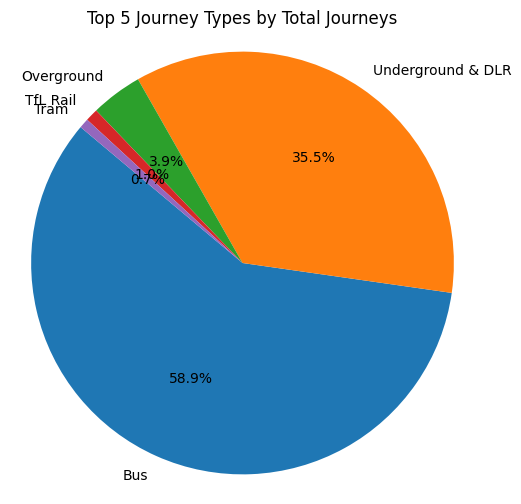

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.pie(popular_modes_df['TOTAL_JOURNEYS'], labels=popular_modes_df['journey_type'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Journey Types by Total Journeys')
plt.axis('equal')
plt.show()

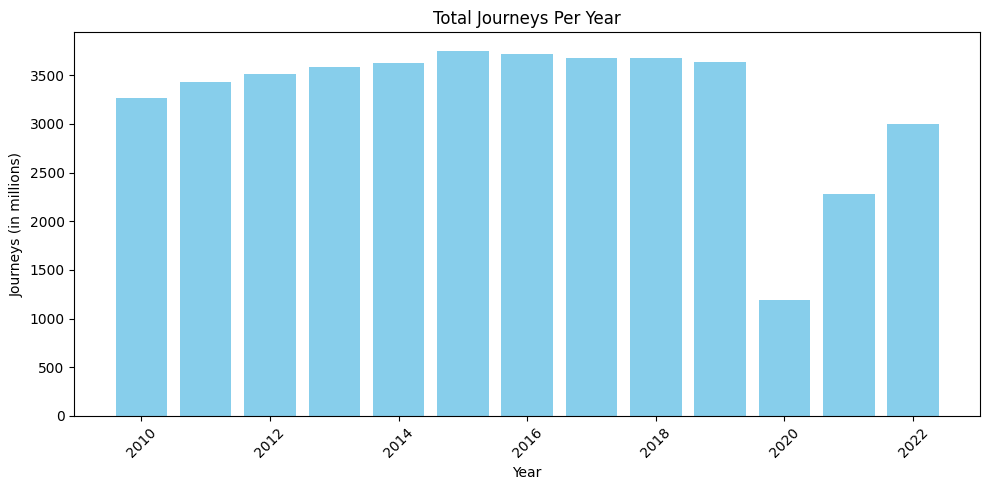

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(result_df['year'], result_df['TOTAL_JOURNEYS'], color='skyblue')
plt.title('Total Journeys Per Year')
plt.xlabel('Year')
plt.ylabel('Journeys (in millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Snowflake SQL Practice**

Install Snowflake

In [26]:
!pip install snowflake-connector-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.8/70.8 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 96.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 9.1 MB/s eta 0:00:00


In [30]:
# STEP 2: Create SQLite DB
conn = sqlite3.connect(':memory:')
df.to_sql('JOURNEYS', conn, index=False, if_exists='replace')


936

Query 1: Emirates Airline – Top 5 months

In [31]:
query = """
WITH emirates_airline_popularity AS (
    SELECT
        MONTH,
        YEAR,
        ROUND(SUM(JOURNEYS_MILLIONS), 2) AS ROUNDED_JOURNEYS_MILLIONS
    FROM JOURNEYS
    WHERE
        MONTH IS NOT NULL AND
        YEAR IS NOT NULL AND
        JOURNEYS_MILLIONS IS NOT NULL AND
        JOURNEY_TYPE = 'Emirates Airline'
    GROUP BY MONTH, YEAR
    ORDER BY ROUNDED_JOURNEYS_MILLIONS DESC
    LIMIT 5
)
SELECT * FROM emirates_airline_popularity;
"""

df_emirates = pd.read_sql_query(query, conn)
df_emirates


,MONTH,YEAR,ROUNDED_JOURNEYS_MILLIONS
0,5,2012,0.53
1,6,2012,0.38
2,4,2012,0.24
3,5,2013,0.19
4,5,2015,0.19


Least Popular Years for Underground & DLR

In [32]:
query2 = """
WITH least_popular_years_tube AS (
    SELECT
        YEAR,
        JOURNEY_TYPE,
        ROUND(SUM(JOURNEYS_MILLIONS), 2) AS TOTAL_JOURNEYS_MILLIONS
    FROM JOURNEYS
    WHERE JOURNEY_TYPE = 'Underground & DLR'
    GROUP BY YEAR, JOURNEY_TYPE
    ORDER BY TOTAL_JOURNEYS_MILLIONS ASC
    LIMIT 5
)
SELECT * FROM least_popular_years_tube;
"""

df_tube = pd.read_sql_query(query2, conn)
df_tube


,YEAR,JOURNEY_TYPE,TOTAL_JOURNEYS_MILLIONS
0,2020,Underground & DLR,310.18
1,2021,Underground & DLR,748.45
2,2022,Underground & DLR,1064.86
3,2010,Underground & DLR,1096.15
4,2011,Underground & DLR,1156.65


**Visualization**

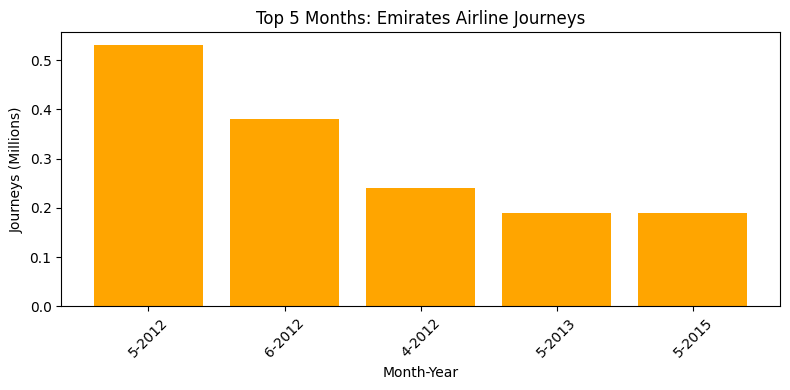

In [33]:
import matplotlib.pyplot as plt

# Plot Emirates Airline
plt.figure(figsize=(8, 4))
plt.bar(df_emirates['MONTH'].astype(str) + '-' + df_emirates['YEAR'].astype(str),
        df_emirates['ROUNDED_JOURNEYS_MILLIONS'], color='orange')
plt.title('Top 5 Months: Emirates Airline Journeys')
plt.xlabel('Month-Year')
plt.ylabel('Journeys (Millions)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Resuable Snowflake

In [34]:
conn = sqlite3.connect(':memory:')
df.to_sql('JOURNEYS', conn, index=False, if_exists='replace')


936

Reusable Query Runner Function

In [35]:
def run_sql(query, connection=conn, preview=True):
    result = pd.read_sql_query(query, connection)
    if preview:
        display(result.head())
    return result


**A. CTE + Filtering: Top 5 Months for Emirates Airline**


In [36]:
query_emirates = """
WITH emirates_airline_popularity AS (
    SELECT
        MONTH,
        YEAR,
        ROUND(SUM(JOURNEYS_MILLIONS), 2) AS ROUNDED_JOURNEYS_MILLIONS
    FROM JOURNEYS
    WHERE
        MONTH IS NOT NULL AND
        YEAR IS NOT NULL AND
        JOURNEYS_MILLIONS IS NOT NULL AND
        JOURNEY_TYPE = 'Emirates Airline'
    GROUP BY MONTH, YEAR
    ORDER BY ROUNDED_JOURNEYS_MILLIONS DESC
    LIMIT 5
)
SELECT * FROM emirates_airline_popularity;
"""

run_sql(query_emirates)


,MONTH,YEAR,ROUNDED_JOURNEYS_MILLIONS
0,5,2012,0.53
1,6,2012,0.38
2,4,2012,0.24
3,5,2013,0.19
4,5,2015,0.19


,MONTH,YEAR,ROUNDED_JOURNEYS_MILLIONS
0,5,2012,0.53
1,6,2012,0.38
2,4,2012,0.24
3,5,2013,0.19
4,5,2015,0.19


**B. Simulate ROW_NUMBER() using RANK-like logic**

In [37]:
query_ranked = """
SELECT
    YEAR,
    JOURNEY_TYPE,
    ROUND(SUM(JOURNEYS_MILLIONS), 2) AS TOTAL_JOURNEYS_MILLIONS
FROM JOURNEYS
WHERE JOURNEY_TYPE = 'Underground & DLR'
GROUP BY YEAR, JOURNEY_TYPE
ORDER BY TOTAL_JOURNEYS_MILLIONS ASC
LIMIT 5;
"""

run_sql(query_ranked)


,year,journey_type,TOTAL_JOURNEYS_MILLIONS
0,2020,Underground & DLR,310.18
1,2021,Underground & DLR,748.45
2,2022,Underground & DLR,1064.86
3,2010,Underground & DLR,1096.15
4,2011,Underground & DLR,1156.65


,year,journey_type,TOTAL_JOURNEYS_MILLIONS
0,2020,Underground & DLR,310.18
1,2021,Underground & DLR,748.45
2,2022,Underground & DLR,1064.86
3,2010,Underground & DLR,1096.15
4,2011,Underground & DLR,1156.65


**Step A: Create TRANSPORT_INFO table**

In [38]:
# Create a second DataFrame to simulate transport metadata
transport_info = pd.DataFrame({
    'JOURNEY_TYPE': ['Bus', 'Underground & DLR', 'Emirates Airline', 'Tram'],
    'CATEGORY': ['Surface', 'Rail', 'Cable Car', 'Light Rail'],
    'IS_ECO_FRIENDLY': ['Yes', 'Yes', 'No', 'Yes']
})

# Write it to the SQLite database
transport_info.to_sql('TRANSPORT_INFO', conn, index=False, if_exists='replace')

# Preview
transport_info.head()


,JOURNEY_TYPE,CATEGORY,IS_ECO_FRIENDLY
0,Bus,Surface,Yes
1,Underground & DLR,Rail,Yes
2,Emirates Airline,Cable Car,No
3,Tram,Light Rail,Yes


**JOIN Example: Enrich JOURNEYS with Metadata**

In [39]:
query_join = """
SELECT
    J.YEAR,
    J.JOURNEY_TYPE,
    T.CATEGORY,
    T.IS_ECO_FRIENDLY,
    ROUND(SUM(JOURNEYS_MILLIONS), 2) AS TOTAL_JOURNEYS_MILLIONS
FROM JOURNEYS J
JOIN TRANSPORT_INFO T ON J.JOURNEY_TYPE = T.JOURNEY_TYPE
GROUP BY J.YEAR, J.JOURNEY_TYPE
ORDER BY J.YEAR;
"""

run_sql(query_join)


,year,journey_type,CATEGORY,IS_ECO_FRIENDLY,TOTAL_JOURNEYS_MILLIONS
0,2010,Bus,Surface,Yes,2115.05
1,2010,Emirates Airline,Cable Car,No,NaN
2,2010,Tram,Light Rail,Yes,25.73
3,2010,Underground & DLR,Rail,Yes,1096.15
4,2011,Bus,Surface,Yes,2153.29


,year,journey_type,CATEGORY,IS_ECO_FRIENDLY,TOTAL_JOURNEYS_MILLIONS
0,2010,Bus,Surface,Yes,2115.05
1,2010,Emirates Airline,Cable Car,No,NaN
2,2010,Tram,Light Rail,Yes,25.73
3,2010,Underground & DLR,Rail,Yes,1096.15
4,2011,Bus,Surface,Yes,2153.29
5,2011,Emirates Airline,Cable Car,No,NaN
6,2011,Tram,Light Rail,Yes,26.20
7,2011,Underground & DLR,Rail,Yes,1156.65
8,2012,Bus,Surface,Yes,2148.50
9,2012,Emirates Airline,Cable Car,No,1.92


 Parameterized Queries in SQLite + Python

In [40]:
def get_filtered_journeys(journey_type):
    query = """
    SELECT
        YEAR, MONTH,
        ROUND(SUM(JOURNEYS_MILLIONS), 2) AS TOTAL
    FROM JOURNEYS
    WHERE JOURNEY_TYPE = ?
    GROUP BY YEAR, MONTH
    ORDER BY YEAR, MONTH;
    """
    return pd.read_sql_query(query, conn, params=(journey_type,))


 Define Function for Filtered Query

In [41]:
def get_filtered_journeys(journey_type):
    query = """
    SELECT
        YEAR, MONTH,
        ROUND(SUM(JOURNEYS_MILLIONS), 2) AS TOTAL
    FROM JOURNEYS
    WHERE JOURNEY_TYPE = ?
    GROUP BY YEAR, MONTH
    ORDER BY YEAR, MONTH;
    """
    return pd.read_sql_query(query, conn, params=(journey_type,))


Call With Custom Input

,year,month,TOTAL
0,2010,1,189.11
1,2010,2,181.60
2,2010,3,175.88
3,2010,4,183.43
4,2010,5,160.42


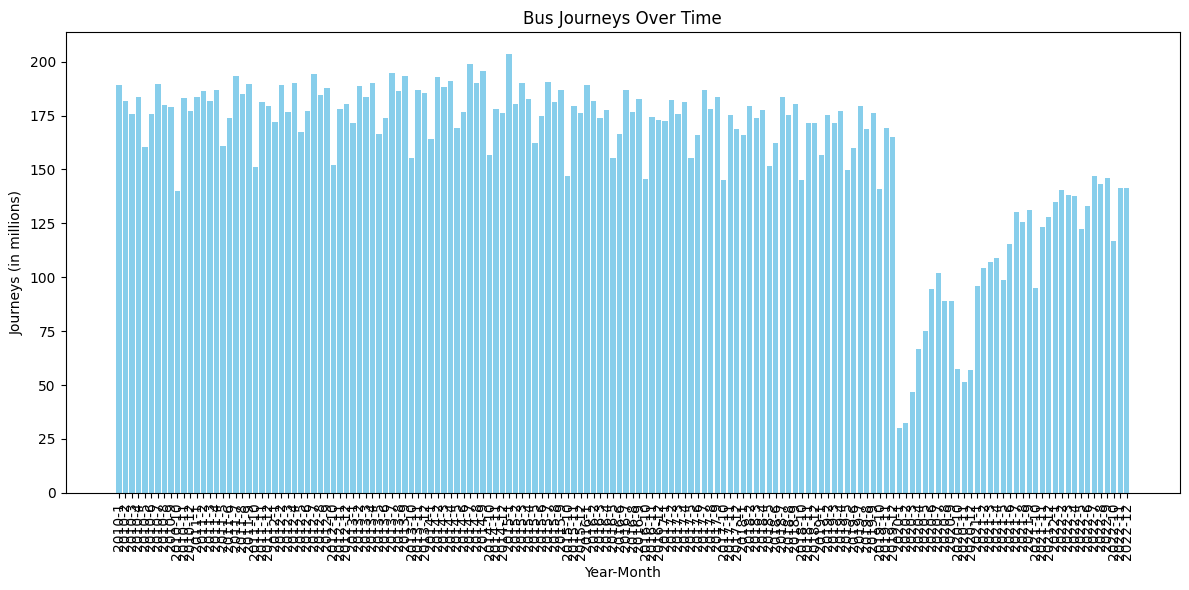

In [44]:
import matplotlib.pyplot as plt

bus_data = get_filtered_journeys("Bus")
display(bus_data.head())

# Optional: Visualize
plt.figure(figsize=(12, 6))
plt.bar(bus_data['year'].astype(str) + '-' + bus_data['month'].astype(str), bus_data['TOTAL'], color='skyblue')
plt.title('Bus Journeys Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Journeys (in millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Simulating ROW_NUMBER() (since SQLite doesn’t support window functions natively)Goal: Rank months by journey count per journey type.


In [45]:
query_row_number_sim = """
SELECT
    j1.JOURNEY_TYPE,
    j1.YEAR,
    j1.MONTH,
    j1.JOURNEYS_MILLIONS,
    (
        SELECT COUNT(*)
        FROM JOURNEYS j2
        WHERE j2.JOURNEY_TYPE = j1.JOURNEY_TYPE
          AND (j2.JOURNEYS_MILLIONS > j1.JOURNEYS_MILLIONS
               OR (j2.JOURNEYS_MILLIONS = j1.JOURNEYS_MILLIONS AND j2.ROWID < j1.ROWID))
    ) + 1 AS ROW_NUMBER
FROM JOURNEYS j1
WHERE j1.JOURNEY_TYPE IN ('Bus', 'Emirates Airline')
ORDER BY JOURNEY_TYPE, ROW_NUMBER
LIMIT 10;
"""

row_number_df = run_sql(query_row_number_sim)


,journey_type,year,month,journeys_millions,ROW_NUMBER
0,Bus,2015,1,203.398289,1
1,Bus,2014,7,198.759813,2
2,Bus,2014,9,195.639185,3
3,Bus,2013,7,194.505985,4
4,Bus,2012,7,194.215106,5


Using CASE WHEN for Conditional Columns: Add eco-friendly label using CASE



In [46]:
query_case_when = """
SELECT
    j.JOURNEY_TYPE,
    j.YEAR,
    SUM(j.JOURNEYS_MILLIONS) AS TOTAL_JOURNEYS,
    CASE
        WHEN t.IS_ECO_FRIENDLY = 'Yes' THEN '🌱 Eco-Friendly'
        ELSE '⚠️ Not Eco-Friendly'
    END AS ECO_LABEL
FROM JOURNEYS j
JOIN TRANSPORT_INFO t ON j.JOURNEY_TYPE = t.JOURNEY_TYPE
GROUP BY j.JOURNEY_TYPE, j.YEAR
ORDER BY j.JOURNEY_TYPE, j.YEAR;
"""

eco_df = run_sql(query_case_when)


,journey_type,year,TOTAL_JOURNEYS,ECO_LABEL
0,Bus,2010,2115.045141,🌱 Eco-Friendly
1,Bus,2011,2153.293028,🌱 Eco-Friendly
2,Bus,2012,2148.496172,🌱 Eco-Friendly
3,Bus,2013,2175.574040,🌱 Eco-Friendly
4,Bus,2014,2177.693200,🌱 Eco-Friendly
